In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression


In [17]:
df1 = pd.read_json('Players_ex_gk_detailed_table.json')
df2 = pd.read_json('Gk_detailed_table.json')
df = pd.concat([df2, df1], ignore_index=True, sort=False)
df = df.sort_values('Player_id', ascending=False)
df = df.reset_index(drop=True)
top_leagues = ['Serie A', 'LaLiga', 'Bundesliga', 'Premier League', 'Ligue 1']
df = df[df['Competition'].isin(top_leagues)]
df = df[df['Season'] == '21/22']
cols_with_dash = df.columns[df.isin(['-']).any()]
df[cols_with_dash] = df[cols_with_dash].replace('-', 0)
df.Assists = df.Assists.fillna(0)
cols_to_convert = ['Player_id', 'Apperance', 'Goals']
df[cols_to_convert] = df[cols_to_convert].astype(int)
df1 = df[['Player_id', 'Season', 'Goals', 'Apperance']]
df1

,Player_id,Season,Goals,Apperance
3,1020544,21/22,0,0
4,1011200,21/22,0,1
11,991649,21/22,0,2
14,991487,21/22,0,0
20,988862,21/22,1,3
...,...,...,...,...
257913,6442,21/22,0,0
259935,5578,21/22,0,0
264087,3455,21/22,8,23
264408,3333,21/22,0,24


In [18]:
df = pd.read_json('player_details.json')
df = df.rename(columns={'Player_ID': 'Player_id'})
df['Current market value'] = df['Current market value'].replace({'k': 'e3', 'm': 'e6','b':'e9'}, regex=True)
df['Current market value'] = pd.to_numeric(df['Current market value'], errors='coerce')
df2 = df[['Player_id','Current market value','Position']]
df2

,Player_id,Current market value,Position
0,427605,8000000.0,Attack
1,434207,5000000.0,Attack
2,92571,2500000.0,Defender
3,284430,1000000.0,Goalkeeper
4,276566,200000.0,midfield
...,...,...,...
9360,61591,200000.0,midfield
9361,129386,1500000.0,Defender
9362,563335,200000.0,Attack
9363,199268,1000000.0,midfield


In [19]:
merged_df = pd.merge(df1, df2, on='Player_id')
merged_df['Current market value'] = merged_df['Current market value'].fillna(0)
df = merged_df.dropna()
df = df.drop_duplicates(subset='Player_id')
df = df.loc[df.Position=='Attack']
df.sort_values('Goals',ascending=False)

,Player_id,Season,Goals,Apperance,Current market value,Position
3513,38253,21/22,35,34,40000000.0,Attack
1695,342229,21/22,28,35,180000000.0,Attack
3602,18922,21/22,27,32,35000000.0,Attack
3062,105521,21/22,27,31,18000000.0,Attack
2815,146854,21/22,25,37,20000000.0,Attack
...,...,...,...,...,...,...
1330,410649,21/22,0,8,600000.0,Attack
2392,225055,21/22,0,11,3500000.0,Attack
252,710004,21/22,0,3,1000000.0,Attack
2388,225452,21/22,0,1,2500000.0,Attack


In [20]:
df = df[['Player_id', 'Goals', 'Current market value']]
df = df[df['Current market value'].notna()]
df = df[df['Goals'].notna()]
# df.sort_values('Current market value',ascending=False).head(20)
df.sort_values('Goals',ascending=False).head(20)

,Player_id,Goals,Current market value
3513,38253,35,40000000.0
1695,342229,28,180000000.0
3602,18922,27,35000000.0
3062,105521,27,18000000.0
2815,146854,25,20000000.0
2287,242086,24,30000000.0
3144,91845,23,60000000.0
2804,148455,23,70000000.0
1294,418560,22,170000000.0
2363,229004,21,15000000.0


In [21]:
df.sort_values('Current market value',ascending=False).head(20)

,Player_id,Goals,Current market value
1695,342229,28,180000000.0
1294,418560,22,170000000.0
1523,371998,17,120000000.0
1342,406635,9,110000000.0
1236,433177,11,110000000.0
1367,401923,14,100000000.0
2879,132098,17,90000000.0
1683,344381,20,80000000.0
1343,406625,21,80000000.0
2173,258923,4,80000000.0


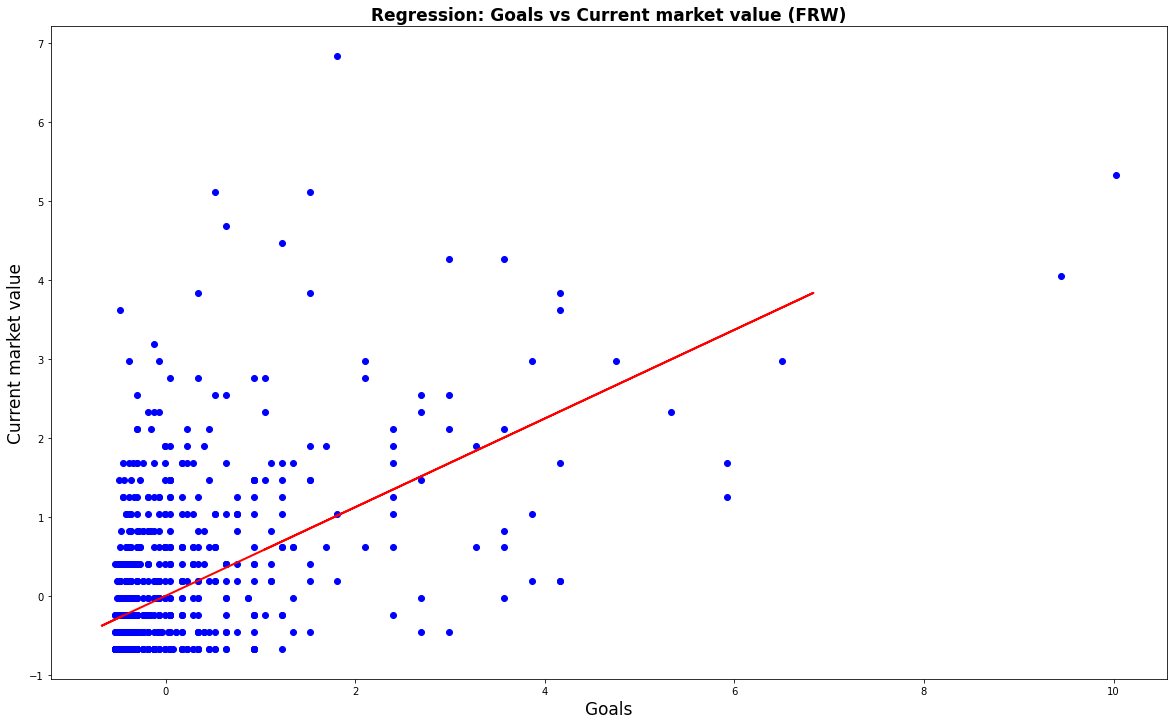

In [22]:

# Remove outliers using z-score method
# z_scores = np.abs((df - df.mean()) / df.std())
# df = df[(z_scores < 3).all(axis=1)]
df=df.drop(columns = 'Player_id')
# Normalize the data
scaler = StandardScaler()
normalized_data = scaler.fit_transform(df)

# Create X and y for regression
X = normalized_data[:, 0].reshape(-1, 1)  # goals
y = normalized_data[:, 1]  # Current market value

# Fit the regression model
regression = LinearRegression()
regression.fit(X, y)

# Plot the regression line
plt.figure(figsize=(20, 12)) 
plt.scatter(y, X, color='blue')
plt.plot(X, regression.predict(X), color='red', linewidth=2)
plt.xlabel('Goals', fontsize=17 )
plt.ylabel('Current market value', fontsize=17 )
plt.title('Regression: Goals vs Current market value (FRW)', fontsize=17 ,fontweight = 'bold')
plt.show()
